In [1]:
import sys
sys.path.append("../") # ugly way to have .py files in the PYTHONPATH

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import read_info_files, read_keyword_files, read_keyword_lists
from utils import get_config
from figures import pie_plot, pie_timeline

In [3]:
CONFIG = "../config.yaml"

In [4]:
config = get_config(CONFIG, section="figures")
input_dir = config["input_dir"]

In [5]:
df_info = read_info_files(input_dir)
df_keys = read_keyword_files(input_dir)

In [6]:
key_names = config.get("key_names")
key_labels = config.get("key_labels")
fig_filename = config.get("filename")


# Fixed keywords

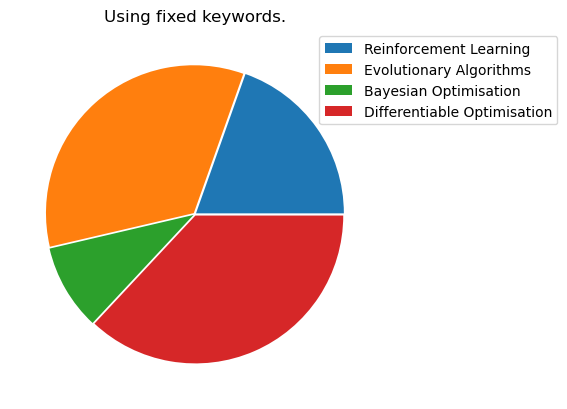

In [7]:
pie_plot(df_keys, key_names, key_labels, "Using fixed keywords.", "optimisation_pie_fixed_keywords.png")


In [8]:
timeline = (
    df_keys[key_names]
    .merge(df_info[["year","id"]], on="id")
    .drop(columns=["id"])
    .groupby("year")
    .sum()
    .query('year >= 2017 & year < 2025')
)
timeline 

,reinforcement learning,evolutionary algorithms,bayesian optimisation,differentiable optimisation
year,,,,
2017,8,5,3,1
2018,20,25,8,14
2019,38,43,15,55
2020,37,59,20,90
2021,33,62,11,88
2022,19,41,17,40
2023,14,41,9,39
2024,21,53,9,41


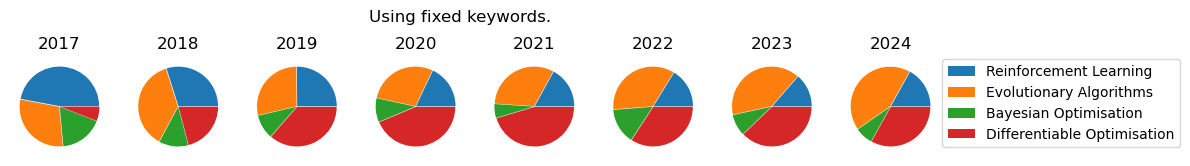

In [9]:
pie_timeline(timeline, key_names, key_labels, "Using fixed keywords.", "optimisation_pie_timeline_fixed_keywords.png")

# LLM Keywords

In [10]:
short_keys = config.get("short_keys")

In [11]:
df_years = df_info[["id", "year"]].set_index("id")
dict_keys = {
    key: " ".join(keys)
    for key, keys in read_keyword_lists(input_dir).items()
}

In [12]:
for name, key in zip(key_names, short_keys):
    ids = [
        id for id in dict_keys.keys()
        if key in dict_keys[id]
    ]
    df_years[name] = False
    df_years.loc[df_years.index.isin(ids), name] = True

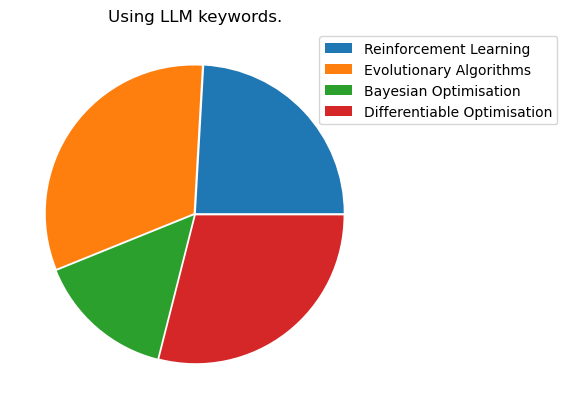

In [13]:
pie_plot(df_years, key_names, key_labels, "Using LLM keywords.", "optimisation_pie_LLM_keywords.png")


In [14]:
timeline2 = (
    df_years[key_names + ["year"]]
    .groupby("year")
    .sum()
    .query('year >= 2017 & year < 2025')
)
timeline2

,reinforcement learning,evolutionary algorithms,bayesian optimisation,differentiable optimisation
year,,,,
2017,6,3,1,0
2018,14,14,7,5
2019,27,19,15,26
2020,24,34,18,40
2021,23,32,10,43
2022,14,22,14,14
2023,6,21,8,14
2024,14,24,8,17


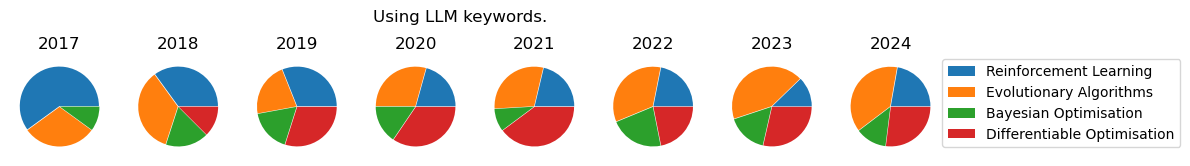

In [15]:
pie_timeline(timeline2, key_names, key_labels, "Using LLM keywords.", "optimisation_pie_timeline_LLM_keywords.png")